### Fijo k, fijo alfa, y defino un intervalo con las cantidades de imágenes que voy a usar para entrenamiento. Las primeras 2 mil las voy a usar para validación.

In [19]:
k = 10
alfa = 15
cantImg = [1]
for i in range(1000,41000,1000):
    cantImg.append(i)

In [20]:
cantImg

[1,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

### Cargo los datos

In [21]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_total = pd.read_csv("../data/train.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Desordeno los datos

In [22]:
df_total = df_total.sample(frac=1, random_state=100)

### Pruebo primero con una sóla imagen de entrenamiento

#### Reduzco el dataset

In [23]:
df_red = df_total[:2001]

In [24]:
df_red

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21028,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7969,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16537,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36659,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5883,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38210,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22066,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Uso values para mandar todo a arrays de numpy
X = df_red[df_red.columns[1:]].values
y = df_red["label"].values.reshape(-1, 1)

X.shape, y.shape

((2001, 784), (2001, 1))

#### Aplico PCA

In [26]:
import metnum

pca = metnum.PCA(alfa)
X = pca.transform(X)

#### Me fijo qué aspecto tienen las componentes principales con este dataset reducido

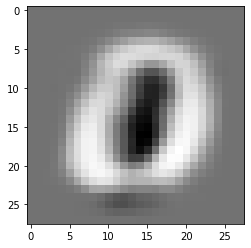

In [27]:
import matplotlib.pyplot as plt

cp = pca.componentesPrincipales()
cp = cp.transpose()
img = cp[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

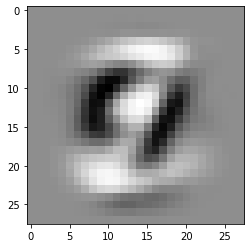

In [28]:
img = cp[1].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Es más o menos igual. Aplico kNN.

In [29]:
X_train, y_train = X[2000:], y[2000:]
X_val, y_val = X[:2000], y[:2000]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 1 instancias de entrenamiento y 2000 de validación


In [30]:
clf = metnum.KNNClassifier(k)
clf.fit(X_train, y_train)

In [31]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.094
CPU times: user 3.98 ms, sys: 0 ns, total: 3.98 ms
Wall time: 3.55 ms


### Ahora pruebo con las cantidades de la lista cantImg

In [33]:
from tqdm import tqdm
import time 


resultados = []

for i in tqdm(cantImg):
    start_time = time.time()
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados.append(acc)
    end_time = time.time()
    total_time = end_time - start_time
    print(total_time)

  2%|▏         | 1/41 [00:21<14:39, 21.98s/it]

Ahora tengo 1 instancias de entrenamiento y 2000 de validación
21.98249077796936
Ahora tengo 1000 instancias de entrenamiento y 2000 de validación


  5%|▍         | 2/41 [00:57<19:22, 29.82s/it]

35.30311846733093
Ahora tengo 2000 instancias de entrenamiento y 2000 de validación


  7%|▋         | 3/41 [01:24<18:13, 28.77s/it]

27.509867906570435
Ahora tengo 3000 instancias de entrenamiento y 2000 de validación


 10%|▉         | 4/41 [01:45<15:46, 25.57s/it]

20.68306279182434
Ahora tengo 4000 instancias de entrenamiento y 2000 de validación


 12%|█▏        | 5/41 [02:09<14:57, 24.93s/it]

23.776870250701904


 15%|█▍        | 6/41 [02:40<15:45, 27.02s/it]

Ahora tengo 5000 instancias de entrenamiento y 2000 de validación
31.07863712310791
Ahora tengo 6000 instancias de entrenamiento y 2000 de validación


 17%|█▋        | 7/41 [03:11<16:07, 28.45s/it]

31.381073713302612
Ahora tengo 7000 instancias de entrenamiento y 2000 de validación


 20%|█▉        | 8/41 [03:37<15:11, 27.63s/it]

25.868754386901855
Ahora tengo 8000 instancias de entrenamiento y 2000 de validación


 22%|██▏       | 9/41 [04:03<14:23, 26.99s/it]

25.589892148971558
Ahora tengo 9000 instancias de entrenamiento y 2000 de validación


 24%|██▍       | 10/41 [04:29<13:54, 26.91s/it]

26.73085927963257
Ahora tengo 10000 instancias de entrenamiento y 2000 de validación


 27%|██▋       | 11/41 [04:57<13:30, 27.01s/it]

27.23266053199768
Ahora tengo 11000 instancias de entrenamiento y 2000 de validación


 29%|██▉       | 12/41 [05:24<13:08, 27.20s/it]

27.646256685256958
Ahora tengo 12000 instancias de entrenamiento y 2000 de validación


 32%|███▏      | 13/41 [05:51<12:40, 27.14s/it]

27.009876489639282
Ahora tengo 13000 instancias de entrenamiento y 2000 de validación


 34%|███▍      | 14/41 [06:27<13:20, 29.65s/it]

35.45455741882324
Ahora tengo 14000 instancias de entrenamiento y 2000 de validación


 37%|███▋      | 15/41 [06:56<12:46, 29.50s/it]

29.127018928527832
Ahora tengo 15000 instancias de entrenamiento y 2000 de validación


 39%|███▉      | 16/41 [07:28<12:35, 30.23s/it]

31.936224222183228
Ahora tengo 16000 instancias de entrenamiento y 2000 de validación


 41%|████▏     | 17/41 [07:59<12:12, 30.52s/it]

31.182695627212524
Ahora tengo 17000 instancias de entrenamiento y 2000 de validación


 44%|████▍     | 18/41 [08:30<11:46, 30.71s/it]

31.14106297492981
Ahora tengo 18000 instancias de entrenamiento y 2000 de validación


 46%|████▋     | 19/41 [09:05<11:40, 31.84s/it]

34.4978404045105
Ahora tengo 19000 instancias de entrenamiento y 2000 de validación


 49%|████▉     | 20/41 [09:36<11:07, 31.79s/it]

31.66886854171753
Ahora tengo 20000 instancias de entrenamiento y 2000 de validación


 51%|█████     | 21/41 [10:10<10:46, 32.35s/it]

33.639139890670776
Ahora tengo 21000 instancias de entrenamiento y 2000 de validación


 54%|█████▎    | 22/41 [10:42<10:15, 32.40s/it]

32.52796292304993
Ahora tengo 22000 instancias de entrenamiento y 2000 de validación


 56%|█████▌    | 23/41 [11:33<11:23, 37.96s/it]

50.93098068237305
Ahora tengo 23000 instancias de entrenamiento y 2000 de validación


 59%|█████▊    | 24/41 [12:10<10:36, 37.44s/it]

36.23708391189575
Ahora tengo 24000 instancias de entrenamiento y 2000 de validación


 61%|██████    | 25/41 [12:49<10:06, 37.92s/it]

39.0201997756958
Ahora tengo 25000 instancias de entrenamiento y 2000 de validación


 63%|██████▎   | 26/41 [13:20<08:59, 35.97s/it]

31.408907175064087
Ahora tengo 26000 instancias de entrenamiento y 2000 de validación


 66%|██████▌   | 27/41 [13:55<08:20, 35.76s/it]

35.271578550338745
Ahora tengo 27000 instancias de entrenamiento y 2000 de validación


 68%|██████▊   | 28/41 [14:29<07:36, 35.15s/it]

33.71519732475281
Ahora tengo 28000 instancias de entrenamiento y 2000 de validación


 71%|███████   | 29/41 [14:58<06:39, 33.28s/it]

28.936486959457397
Ahora tengo 29000 instancias de entrenamiento y 2000 de validación


 73%|███████▎  | 30/41 [15:29<05:57, 32.51s/it]

30.712588787078857
Ahora tengo 30000 instancias de entrenamiento y 2000 de validación


 76%|███████▌  | 31/41 [15:58<05:16, 31.67s/it]

29.71239399909973
Ahora tengo 31000 instancias de entrenamiento y 2000 de validación


 78%|███████▊  | 32/41 [16:29<04:41, 31.29s/it]

30.411615133285522
Ahora tengo 32000 instancias de entrenamiento y 2000 de validación


 80%|████████  | 33/41 [16:58<04:04, 30.56s/it]

28.840315103530884
Ahora tengo 33000 instancias de entrenamiento y 2000 de validación


 83%|████████▎ | 34/41 [17:29<03:35, 30.75s/it]

31.192479372024536
Ahora tengo 34000 instancias de entrenamiento y 2000 de validación


 85%|████████▌ | 35/41 [18:00<03:05, 30.99s/it]

31.55204677581787
Ahora tengo 35000 instancias de entrenamiento y 2000 de validación


 88%|████████▊ | 36/41 [18:32<02:36, 31.25s/it]

31.850323915481567
Ahora tengo 36000 instancias de entrenamiento y 2000 de validación


 90%|█████████ | 37/41 [19:05<02:06, 31.75s/it]

32.9103467464447
Ahora tengo 37000 instancias de entrenamiento y 2000 de validación


 93%|█████████▎| 38/41 [19:42<01:40, 33.37s/it]

37.146596908569336
Ahora tengo 38000 instancias de entrenamiento y 2000 de validación


 95%|█████████▌| 39/41 [20:18<01:07, 33.93s/it]

35.25667142868042
Ahora tengo 39000 instancias de entrenamiento y 2000 de validación


 98%|█████████▊| 40/41 [20:55<00:34, 34.88s/it]

37.094409465789795
Ahora tengo 40000 instancias de entrenamiento y 2000 de validación


100%|██████████| 41/41 [21:34<00:00, 31.58s/it]

39.37866735458374


In [15]:
resultados

[0.0905,
 0.871,
 0.895,
 0.9125,
 0.921,
 0.9275,
 0.933,
 0.9325,
 0.93,
 0.937,
 0.937,
 0.9415,
 0.943,
 0.943,
 0.942,
 0.941,
 0.9435,
 0.943,
 0.9415,
 0.9435,
 0.944,
 0.945,
 0.9465,
 0.9485,
 0.9465,
 0.946,
 0.948,
 0.948,
 0.9485,
 0.947,
 0.9485,
 0.949,
 0.9515,
 0.951,
 0.951,
 0.9535,
 0.9515,
 0.9505,
 0.9515,
 0.9525,
 0.953]

### Agrego algunos resultados más para para cantidades entre 2 y 1000.

In [16]:
cantImg2 = [2,25,50,75]
for i in range(100,1000,100):
    cantImg2.append(i)

In [17]:
cantImg2

[2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [18]:
resultados2 = []

for i in tqdm(cantImg2):
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados2.append(acc)

  8%|▊         | 1/13 [00:48<09:46, 48.90s/it]

Ahora tengo 2 instancias de entrenamiento y 2000 de validación


 15%|█▌        | 2/13 [01:40<09:14, 50.41s/it]

Ahora tengo 25 instancias de entrenamiento y 2000 de validación


 23%|██▎       | 3/13 [02:17<07:24, 44.41s/it]

Ahora tengo 50 instancias de entrenamiento y 2000 de validación


 31%|███       | 4/13 [02:49<05:53, 39.27s/it]

Ahora tengo 75 instancias de entrenamiento y 2000 de validación


 38%|███▊      | 5/13 [03:12<04:28, 33.50s/it]

Ahora tengo 100 instancias de entrenamiento y 2000 de validación


 46%|████▌     | 6/13 [03:44<03:52, 33.14s/it]

Ahora tengo 200 instancias de entrenamiento y 2000 de validación


 54%|█████▍    | 7/13 [04:39<04:00, 40.08s/it]

Ahora tengo 300 instancias de entrenamiento y 2000 de validación


 62%|██████▏   | 8/13 [05:30<03:38, 43.63s/it]

Ahora tengo 400 instancias de entrenamiento y 2000 de validación


 69%|██████▉   | 9/13 [06:03<02:41, 40.35s/it]

Ahora tengo 500 instancias de entrenamiento y 2000 de validación


 77%|███████▋  | 10/13 [06:32<01:50, 36.78s/it]

Ahora tengo 600 instancias de entrenamiento y 2000 de validación


 85%|████████▍ | 11/13 [07:01<01:08, 34.39s/it]

Ahora tengo 700 instancias de entrenamiento y 2000 de validación


 92%|█████████▏| 12/13 [07:29<00:32, 32.44s/it]

Ahora tengo 800 instancias de entrenamiento y 2000 de validación


100%|██████████| 13/13 [07:53<00:00, 36.45s/it]

Ahora tengo 900 instancias de entrenamiento y 2000 de validación


In [19]:
resultados2

[0.102,
 0.238,
 0.3585,
 0.514,
 0.6265,
 0.7445,
 0.7795,
 0.8075,
 0.823,
 0.8435,
 0.8545,
 0.861,
 0.862]

### Combino los resultados

In [ ]:
todosLosResultados = []

In [ ]:
todosLosResultados.append(resultados[0])

In [ ]:
todosLosResultados = todosLosResultados + resultados2

In [ ]:
todosLosResultados

In [24]:
todosLosResultados = todosLosResultados + resultados[1:]

In [25]:
todosLosResultados

[0.0905,
 0.102,
 0.238,
 0.3585,
 0.514,
 0.6265,
 0.7445,
 0.7795,
 0.8075,
 0.823,
 0.8435,
 0.8545,
 0.861,
 0.862,
 0.871,
 0.895,
 0.9125,
 0.921,
 0.9275,
 0.933,
 0.9325,
 0.93,
 0.937,
 0.937,
 0.9415,
 0.943,
 0.943,
 0.942,
 0.941,
 0.9435,
 0.943,
 0.9415,
 0.9435,
 0.944,
 0.945,
 0.9465,
 0.9485,
 0.9465,
 0.946,
 0.948,
 0.948,
 0.9485,
 0.947,
 0.9485,
 0.949,
 0.9515,
 0.951,
 0.951,
 0.9535,
 0.9515,
 0.9505,
 0.9515,
 0.9525,
 0.953]

### Ahora grafico esto

In [26]:
cantidades = []

In [27]:
cantidades.append(1)

In [28]:
cantidades

[1]

In [29]:
cantidades = cantidades + cantImg2

In [30]:
cantidades

[1, 2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [31]:
cantidades = cantidades + cantImg[1:]

In [32]:
cantidades

[1,
 2,
 25,
 50,
 75,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

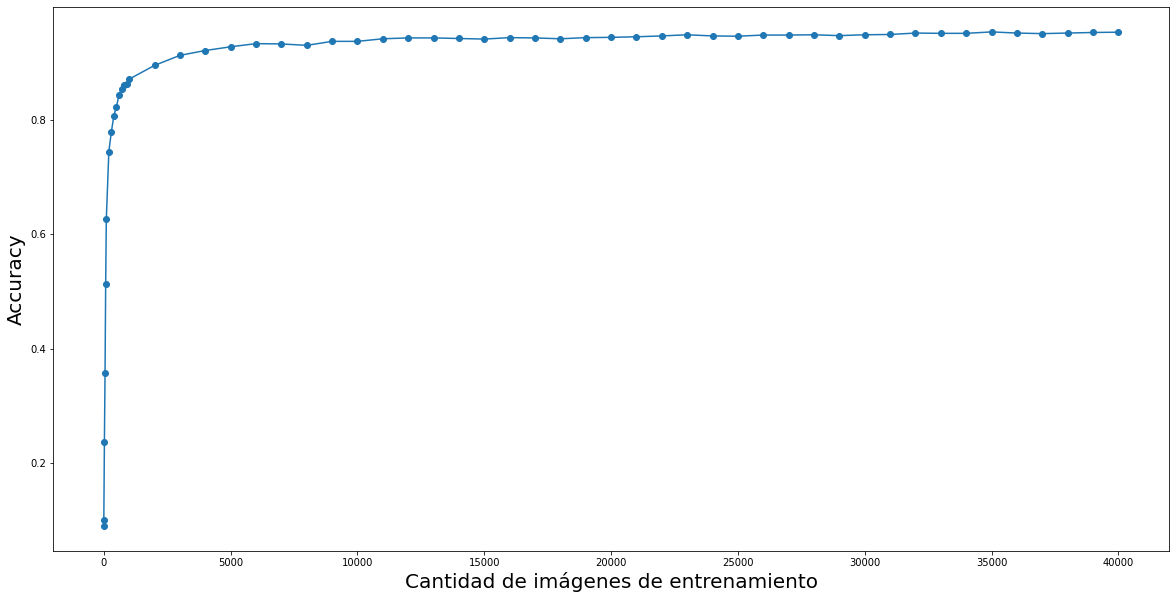

In [34]:
plt.scatter(cantidades,todosLosResultados)
plt.plot(cantidades,todosLosResultados)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('Cantidad de imágenes de entrenamiento', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.savefig("cambio_cant_imagenes.png", bbox_inches='tight')